In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
pymaceuticals_data_complete = clinical_trial_data.reset_index().merge(mouse_drug_data, on='Mouse ID', how="left").set_index('index')
pymaceuticals_data_complete.index.name = None

# Display the data table for preview
pymaceuticals_data_complete.head(5)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_volume_mean_df = pymaceuticals_data_complete.groupby(['Drug', 'Timepoint']).agg({'Tumor Volume (mm3)':'mean'})

# Convert to DataFrame, reset index
tumor_volume_mean_df.reset_index(inplace=True)

# Preview DataFrame
tumor_volume_mean_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_volume_sem_df = pymaceuticals_data_complete.groupby(['Drug', 'Timepoint']).agg({'Tumor Volume (mm3)':'sem'})

# Convert to DataFrame, reset index
tumor_volume_sem_df.reset_index(inplace=True)

# Preview DataFrame
tumor_volume_sem_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [6]:
# Minor Data Munging to Re-Format the Data Frames
tumor_volume_mean_df1 = tumor_volume_mean_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
tumor_volume_mean_df1.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


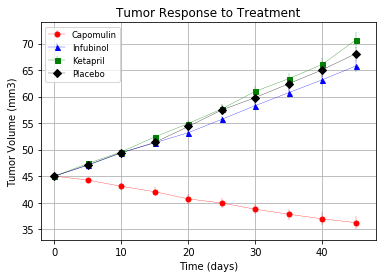

In [21]:
# Generate the Plot (with Error Bars)
## Prepare data for the plot. Merge 2 datasets, mean and standard error mean.
tumor_volume_sem_df1 = tumor_volume_sem_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
tumore_volume_with_err_df = tumor_volume_mean_df1.merge(tumor_volume_sem_df1, left_index=True, right_index=True)
tumore_volume_with_err_df.reset_index(inplace=True)

ax = tumore_volume_with_err_df.plot('Timepoint', 'Capomulin_x', yerr='Capomulin_y', marker='o', markersize=5, linewidth=0.3, c='red', label='Capomulin', title='Tumor Response to Treatment')
tumore_volume_with_err_df.plot('Timepoint', 'Infubinol_x', yerr='Infubinol_y', marker='^', markersize=5, linewidth=0.3, c='blue', label='Infubinol', ax=ax)
tumore_volume_with_err_df.plot('Timepoint', 'Ketapril_x', yerr='Ketapril_y', marker='s', markersize=5, linewidth=0.3, c='green', label='Ketapril', ax=ax)
tumore_volume_with_err_df.plot('Timepoint', 'Placebo_x', yerr='Placebo_y', marker='D', markersize=5, linewidth=0.3, c='black', label='Placebo', ax=ax)

plt.xlim(-2, 48)
plt.ylim(33, 74)
plt.grid()
plt.xlabel('Time (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend(loc='upper left', fontsize='small')

# Save the Figure
plt.savefig("images/TumorVolumePlot.png")

In [55]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_sites_mean_df = pymaceuticals_data_complete.groupby(['Drug', 'Timepoint']).agg({'Metastatic Sites':'mean'})

# Preview DataFrame
metastatic_sites_mean_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_sites_sem_df = pymaceuticals_data_complete.groupby(['Drug', 'Timepoint']).agg({'Metastatic Sites':'sem'})

# Preview DataFrame
metastatic_sites_sem_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [11]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_sites_mean_df.reset_index(inplace=True)
metastatic_sites_mean_df1 = metastatic_sites_mean_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
metastatic_sites_mean_df1

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [12]:
# Reformat Standard Error dataframe
metastatic_sites_sem_df.reset_index(inplace=True)
metastatic_sites_sem_df1 = metastatic_sites_sem_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

In [13]:
# Merge two dataframes
metastatic_sites_with_err_df = metastatic_sites_mean_df1.merge(metastatic_sites_sem_df1, left_index=True, right_index=True)
metastatic_sites_with_err_df.reset_index(inplace=True)

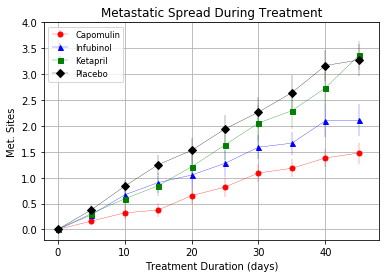

In [14]:
# Generate the Plot (with Error Bars)
ax1 = metastatic_sites_with_err_df.plot('Timepoint', 'Capomulin_x', yerr='Capomulin_y', marker='o', markersize=5, linewidth=0.3, c='red', label='Capomulin', title='Metastatic Spread During Treatment')
metastatic_sites_with_err_df.plot('Timepoint', 'Infubinol_x', yerr='Infubinol_y', marker='^', markersize=5, linewidth=0.3, c='blue', label='Infubinol', ax=ax1)
metastatic_sites_with_err_df.plot('Timepoint', 'Ketapril_x', yerr='Ketapril_y', marker='s', markersize=5, linewidth=0.3, c='green', label='Ketapril', ax=ax1)
metastatic_sites_with_err_df.plot('Timepoint', 'Placebo_x', yerr='Placebo_y', marker='D', markersize=5, linewidth=0.3, c='black', label='Placebo', ax=ax1)

plt.xlim(-2, 48)
plt.ylim(-0.2, 4.0)
plt.grid()
plt.xlabel('Treatment Duration (days)')
plt.ylabel('Met. Sites')
plt.legend(loc='upper left', fontsize='small')

# Save the Figure
plt.savefig("images/MetastaticSitesPlot.png")

In [14]:
# Show the Figure
plt.show()

## Survival Rates

In [15]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count_df = pymaceuticals_data_complete.groupby(['Drug', 'Timepoint']).agg({'Mouse ID':'count'})

# Reset Index, rename column name
mice_count_df.reset_index(inplace=True)
mice_count_df = mice_count_df.rename(columns={"Mouse ID":"Mouse Count"})

# Preview DataFrame
mice_count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [16]:
# Minor Data Munging to Re-Format the Data Frames
mice_count_df1 = mice_count_df.pivot(index='Timepoint', columns='Drug', values='Mouse Count')

# Preview the Data Frame
mice_count_df1.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


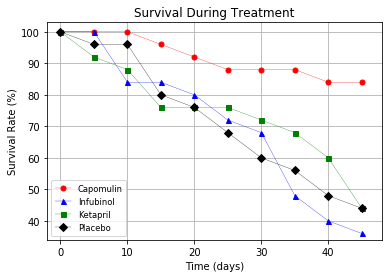

In [17]:
# Generate the Plot (Accounting for percentages)
mouse_capomulin = mice_count_df1.iloc[0]['Capomulin']
survival_capomulin = mice_count_df1['Capomulin']/mouse_capomulin*100

mouse_infubinol = mice_count_df1.iloc[0]['Infubinol']
survival_infubinol = mice_count_df1['Infubinol']/mouse_infubinol*100

mouse_ketapril = mice_count_df1.iloc[0]['Ketapril']
survival_ketapril = mice_count_df1['Ketapril']/mouse_ketapril*100

mouse_placebo = mice_count_df1.iloc[0]['Placebo']
survival_placebo = mice_count_df1['Placebo']/mouse_placebo*100

survival_df = pd.DataFrame({'Capomulin': survival_capomulin, 'Infubinol': survival_infubinol, 'Ketapril': survival_ketapril, 'Placebo': survival_placebo}, index=mice_count_df1.index)
survival_df.reset_index(inplace=True)

ax2 = survival_df.plot('Timepoint', 'Capomulin', marker='o', markersize=5, linewidth=0.3, c='red', label='Capomulin', title='Survival During Treatment')
survival_df.plot('Timepoint', 'Infubinol', marker='^', markersize=5, linewidth=0.3, c='blue', label='Infubinol', ax=ax2)
survival_df.plot('Timepoint', 'Ketapril', marker='s', markersize=5, linewidth=0.3, c='green', label='Ketapril', ax=ax2)
survival_df.plot('Timepoint', 'Placebo', marker='D', markersize=5, linewidth=0.3, c='black', label='Placebo', ax=ax2)

plt.xlim(-2, 48)
plt.ylim(34, 103)
plt.grid()
plt.xlabel('Time (days)')
plt.ylabel('Survival Rate (%)')
plt.legend(loc='lower left', fontsize='small')

# Save the Figure
plt.savefig("images/SurvivalRatePlot.png")

In [18]:
plt.show()

## Summary Bar Graph

In [18]:
# Calculate the percent changes for each drug
percent_change = (tumor_volume_mean_df1.iloc[-1] - tumor_volume_mean_df1.iloc[0])/tumor_volume_mean_df1.iloc[0]*100

# Display the data to confirm
percent_change 

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

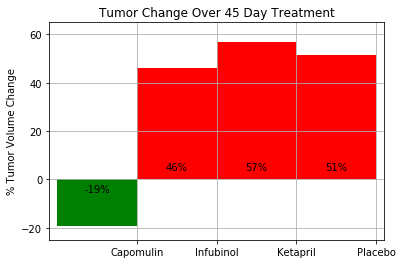

In [20]:
# Store all Relevant Percent Changes into a Tuple
percent_change_tp = tuple(percent_change)

# Splice the data between passing and failing drugs, generate bar graph
fig, ax3 = plt.subplots()

summary_df = pd.DataFrame({'Drug': ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], \
                           'Summary': [percent_change_tp[0], percent_change_tp[2], percent_change_tp[3], percent_change_tp[5]]})
summary_df['Positive'] = summary_df['Summary']>0

x_axis_drug = np.arange(len(summary_df.index))
y_axis_summary = summary_df['Summary']

summary_bar = ax3.bar(x_axis_drug, y_axis_summary, 1, color=summary_df.Positive.map({True: 'r', False: 'g'}), align="edge")

# Orient widths. Add labels, tick marks, etc. 
tick_locations = [1, 2, 3, 4]
plt.xticks(tick_locations, ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], ha='center')

y_ticks = np.arange(-20, 80, 20)
ax3.set_yticks(y_ticks)

plt.xlim(-0.1, 4.1)
plt.ylim(-25, 65)
plt.grid(which='major')
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change Over 45 Day Treatment')

# Use functions to label the percentages of changes
def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            label_height = 3
        else:
            label_height = -6
        ax3.text(rect.get_x() + rect.get_width()/2., label_height,
                 '{:}%'.format(int(height)),
                ha='center', va='bottom')


# Call functions to implement the function calls
autolabel(summary_bar)

# Save the Figure
plt.savefig("images/SummaryBar.png")

In [21]:
# Show the Figure
plt.show()